In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, precision_recall_curve, auc, precision_score,
                             PrecisionRecallDisplay, RocCurveDisplay)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 0. Загрузка данных

In [2]:
df = pd.read_csv('../content/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## 1. Базовое решение

### 1.1 Удаление всех пропущенных значений

In [3]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [4]:
df = df.dropna()
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


### 1.2 Удаление всех категориальных признаков

In [5]:
num_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
cat_features = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
bin_features = ['RainToday']
target_feature = ['RainTomorrow']

In [6]:
df.drop(columns=cat_features + bin_features, inplace=True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No


### 1.3 Обучение модели

In [7]:
# преобразуем метки целевого признака в числовые значения

df.loc[df['RainTomorrow'] == 'Yes', 'RainTomorrow'] = 1
df.loc[df['RainTomorrow'] == 'No', 'RainTomorrow'] = 0
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0


In [8]:
X = df.drop(columns='RainTomorrow')
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,             # применим из-за дисбаланса классов
                                                    random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

X_train.shape, X_test.shape

((45136, 16), (11284, 16))

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [10]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
pred_proba_test = lr.predict_proba(X_test)

### 1.4 Подсчет метрик качества

In [11]:
# для train'а
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     35194
           1       0.72      0.52      0.61      9942

    accuracy                           0.85     45136
   macro avg       0.80      0.73      0.76     45136
weighted avg       0.84      0.85      0.84     45136



In [12]:
# для test'а
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      8799
           1       0.72      0.52      0.60      2485

    accuracy                           0.85     11284
   macro avg       0.80      0.73      0.76     11284
weighted avg       0.84      0.85      0.84     11284



<Figure size 1200x1000 with 0 Axes>

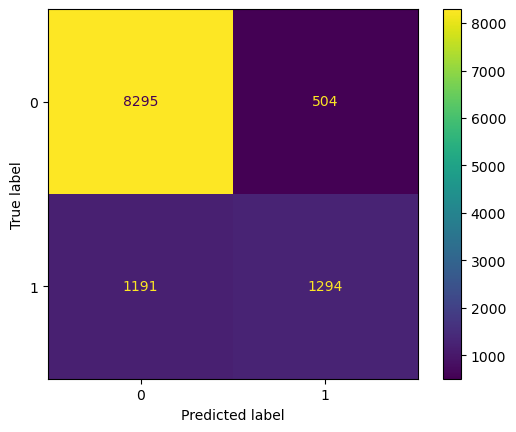

In [13]:
# матрица ошибок
plt.figure(figsize=(12, 10))

cm = confusion_matrix(y_test, pred_test, labels=lr.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
display.plot()
plt.show();

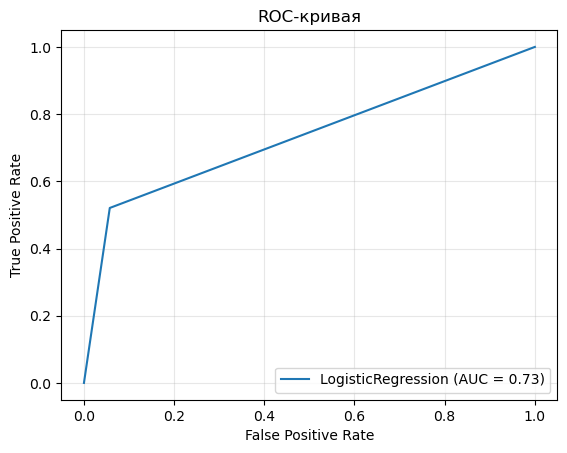

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test)
display = RocCurveDisplay(fpr=fpr, tpr=tpr
                          , roc_auc=auc(fpr, tpr)
                          , estimator_name='LogisticRegression')
display.plot()
plt.title('ROC-кривая')
plt.grid(True, alpha=.3)
plt.show()

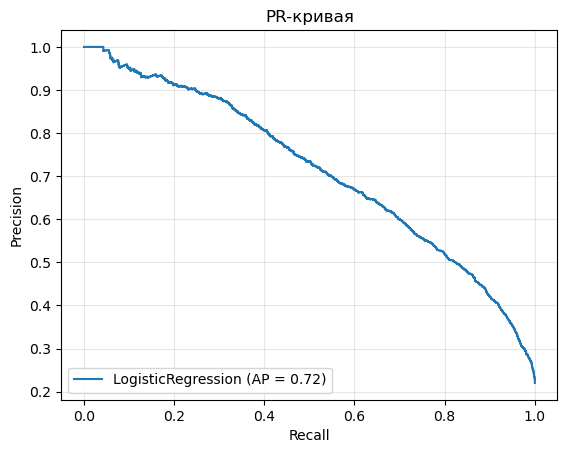

In [15]:
pr, r, _ = precision_recall_curve(y_test, pred_proba_test[:, 1])            # для класса 1

display = PrecisionRecallDisplay(precision=pr, recall=r
                                 , average_precision=precision_score(y_test, pred_test)
                                 , estimator_name='LogisticRegression')
display.plot()
plt.title("PR-кривая")
plt.grid(True, alpha=.3)
plt.show()

## 2. Первичный анализ данных

In [16]:
df = pd.read_csv('../content/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [18]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Датасет имеет 145 460 наблюдений, в некоторых признаках имеются пропуски. Всего 22 признака: 16 числовых, 7 категориальных. Целевой признак - 'RainTomorrow'.

## 3. Визуальный анализ данных

### 3.1 Вещественные признаки

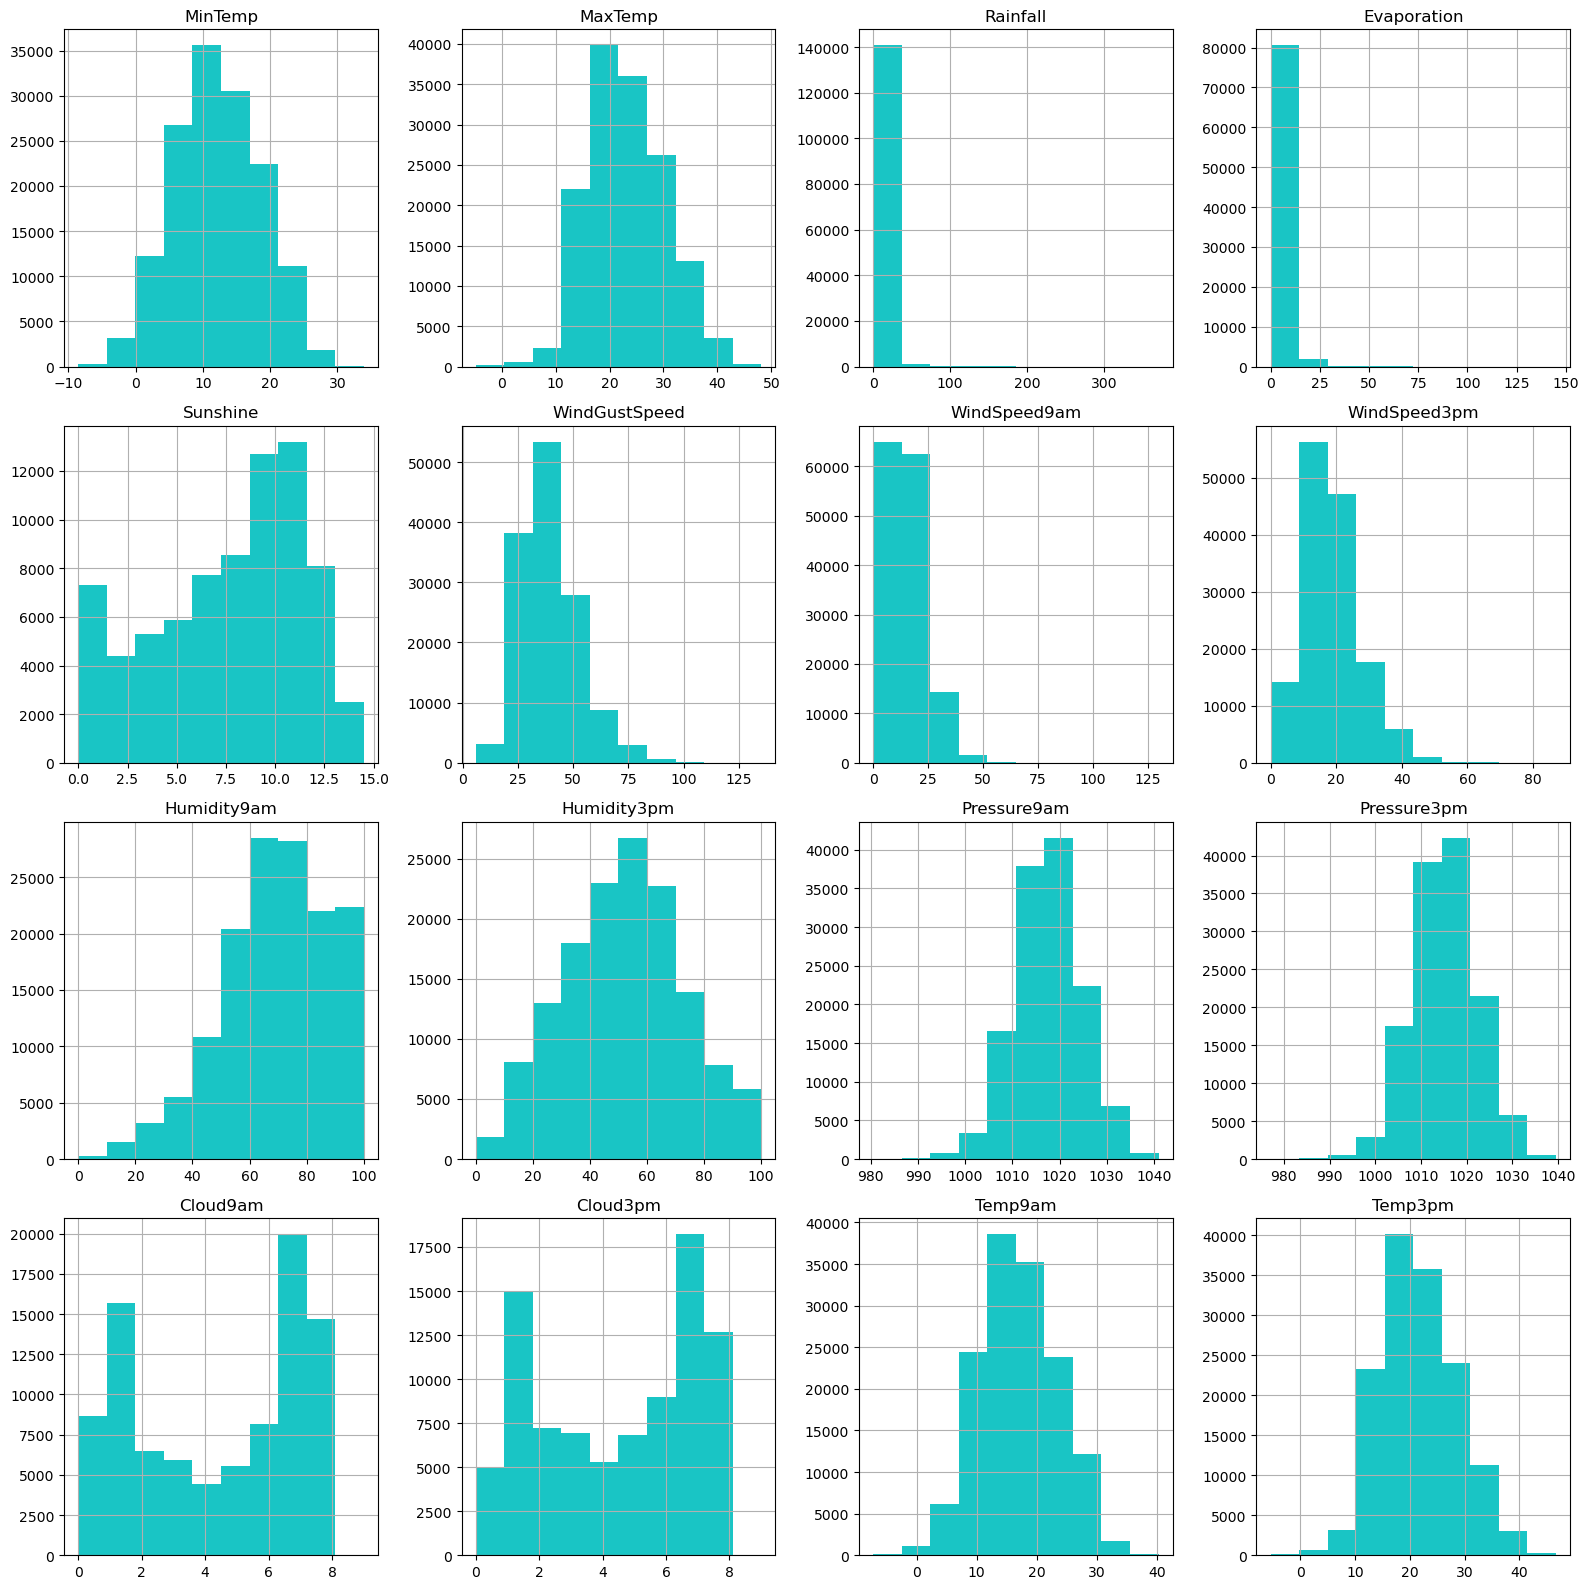

In [19]:
df[num_features].hist(figsize=(16, 16), color='c', alpha=.9)
plt.tight_layout();

Признаки с выбросами:

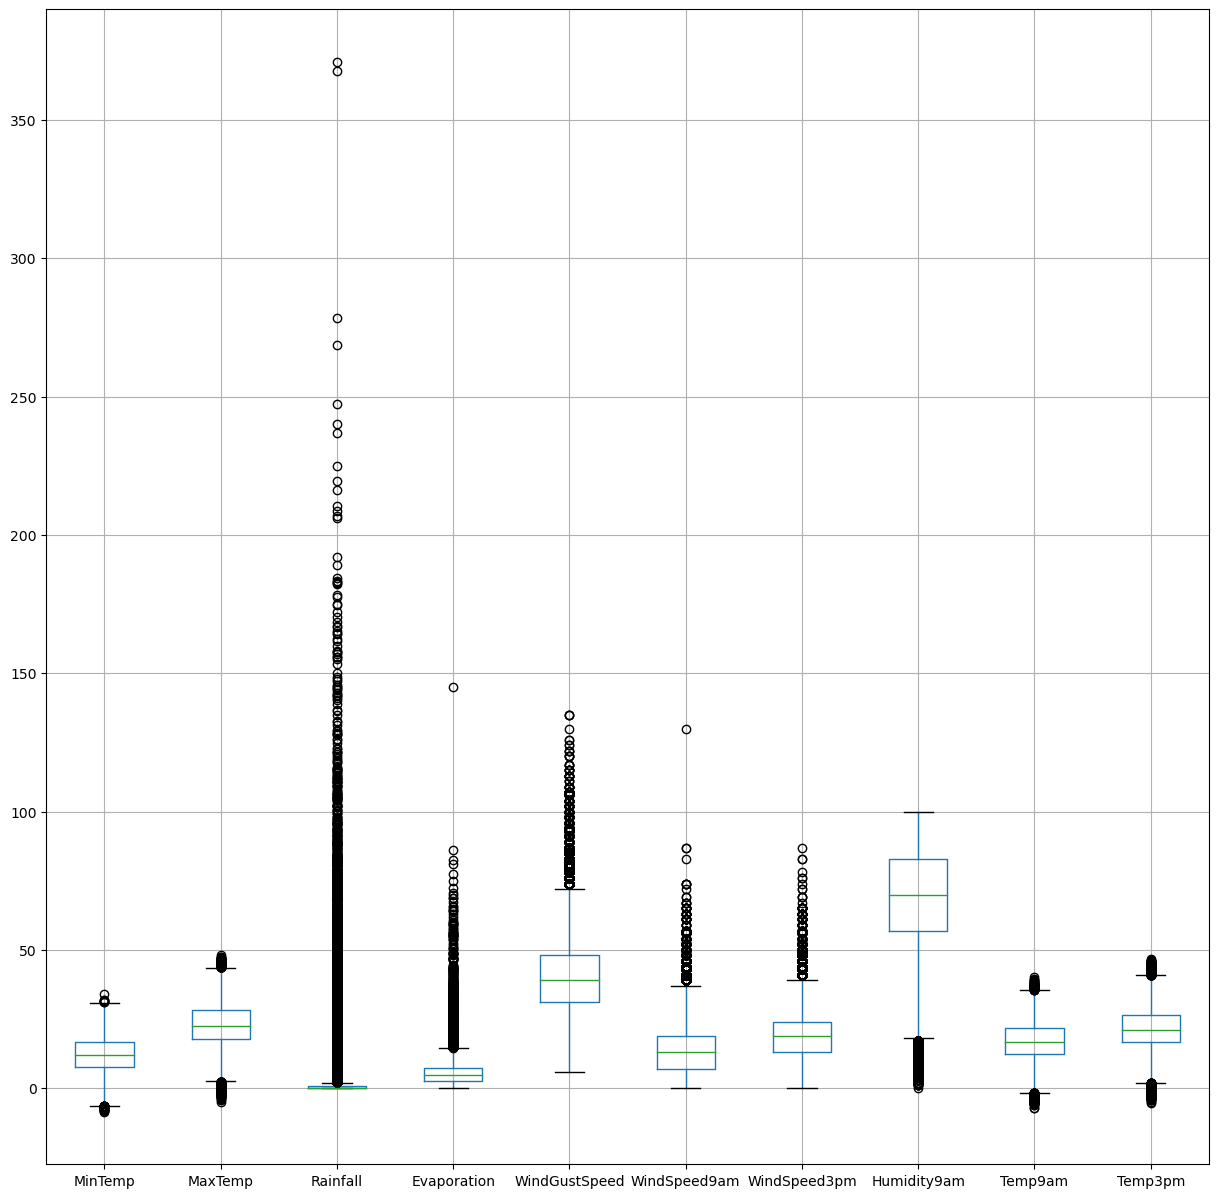

In [20]:
df.boxplot(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation'
            , 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'
            , 'Humidity9am', 'Temp9am', 'Temp3pm']
            , figsize=(15, 15));

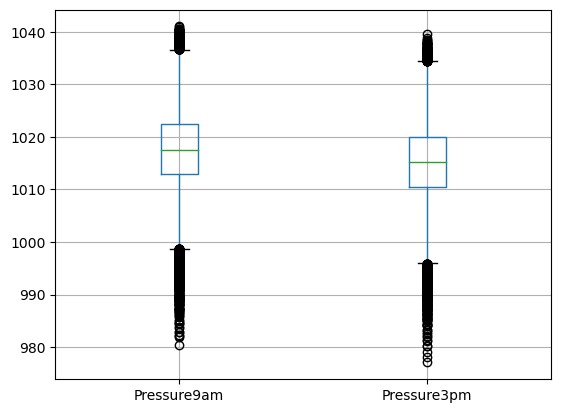

In [21]:
df.boxplot(['Pressure9am', 'Pressure3pm']);

### 3.2 Вещественные признаки

In [22]:
for feature in cat_features + bin_features + target_feature:
    print(str(df[feature].value_counts()) + '\n' + '*' * 50)

2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64
**************************************************
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                300

Почти везде имеется дисбаланс классов

In [23]:
# конвертация столбца с датой в тип "datetime64"
df["Date"] = pd.to_datetime(df["Date"])
df["Date"]

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
145459   2017-06-25
Name: Date, Length: 145460, dtype: datetime64[ns]

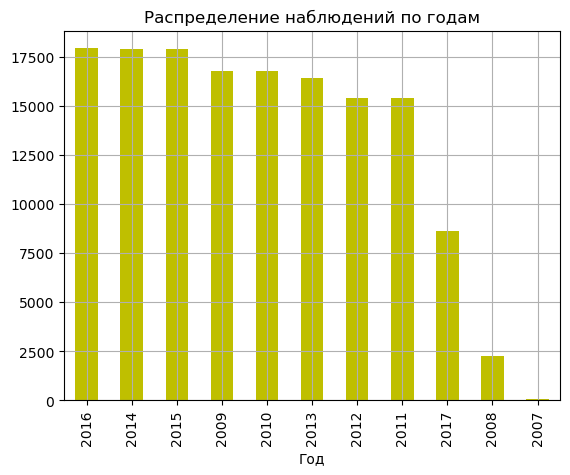

In [24]:
date_period_df = df["Date"].dt.to_period('Y').value_counts().reset_index()  # группировка по годам и подсчет распределения
date_period_df.columns = ["Date", "counts"]

date_period_df.plot(x="Date"
                     , title='Распределение наблюдений по годам'
                     , kind='bar'
                     , legend=False
                     , xlabel='Год'
                     , grid=True
                     , color='y');

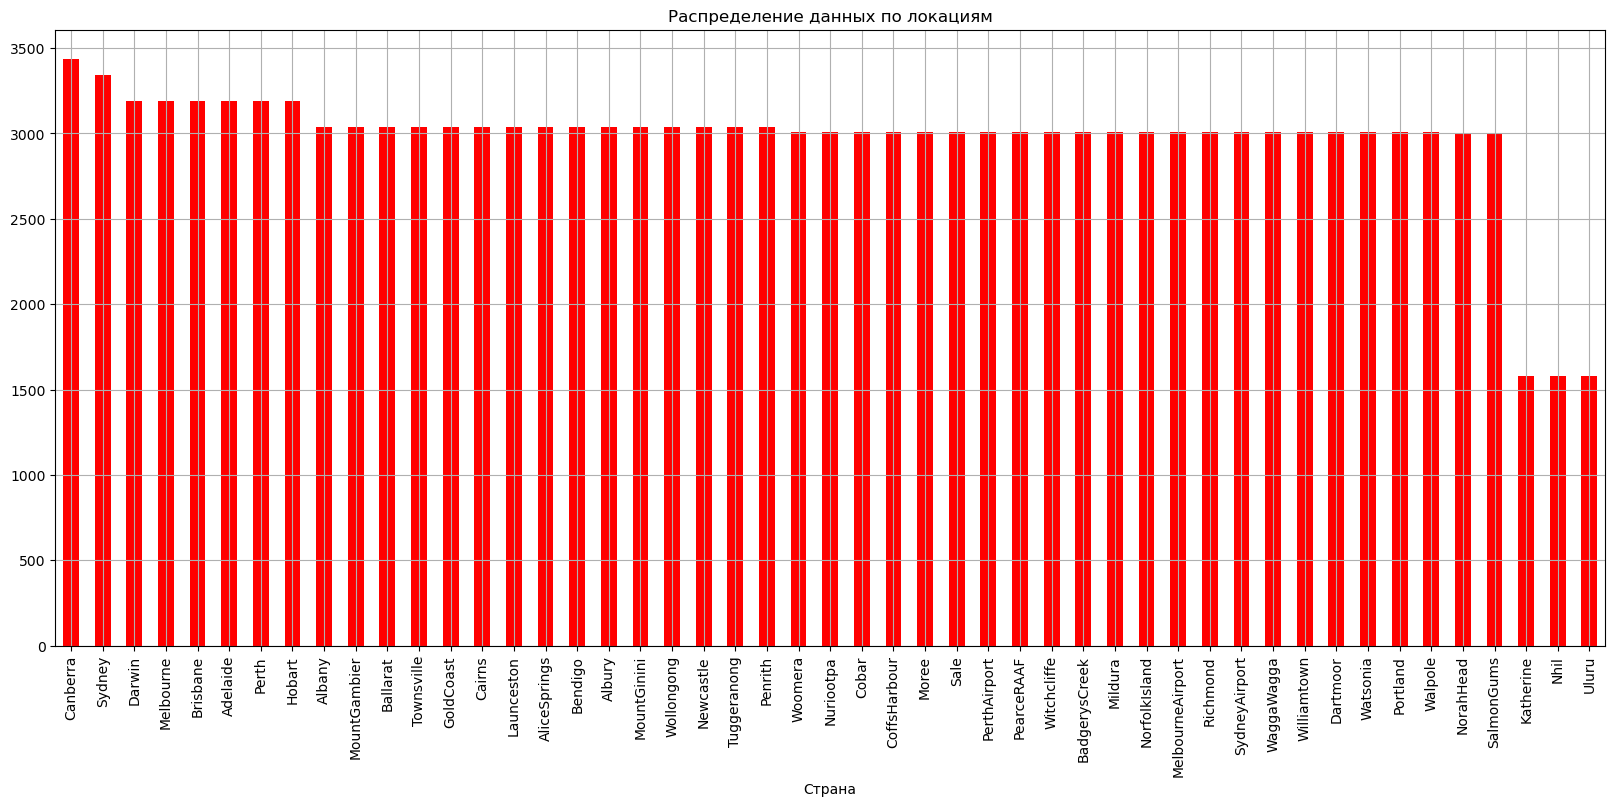

In [25]:
location_counts_df = df["Location"].value_counts().reset_index()
location_counts_df.columns = ["Location", "counts"]

location_counts_df.plot(x="Location"
                     , title='Распределение данных по локациям'
                     , kind='bar'
                     , legend=False
                     , xlabel='Страна'
                     , grid=True
                     , color='r'
                     , figsize=(20, 8));

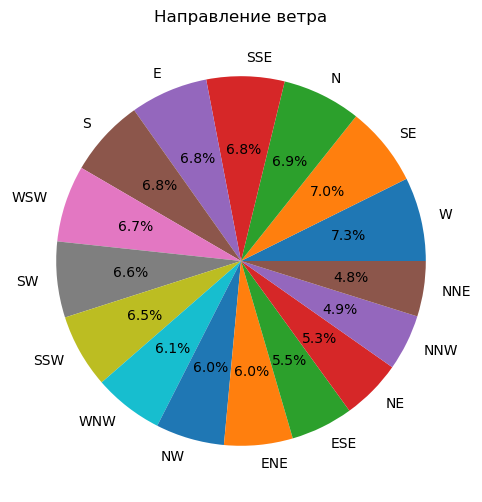

In [26]:
wind_gust_dir_counts_df = df["WindGustDir"].value_counts()

plt.figure(figsize=(10, 6))
plt.title('Направление ветра')
plt.pie(wind_gust_dir_counts_df.values
        , labels=wind_gust_dir_counts_df.index
        , autopct='%.1f%%'
        );

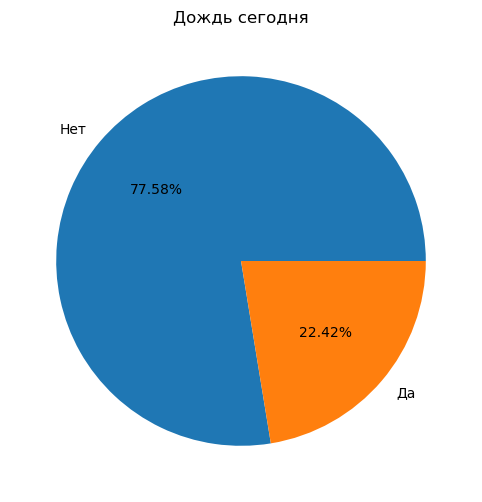

In [27]:
rain_today_counts_df = df["RainToday"].value_counts()

plt.figure(figsize=(10, 6))
plt.title('Дождь сегодня')
plt.pie(rain_today_counts_df.values
        , labels=["Нет", "Да"]
        , autopct='%.2f%%'
        );

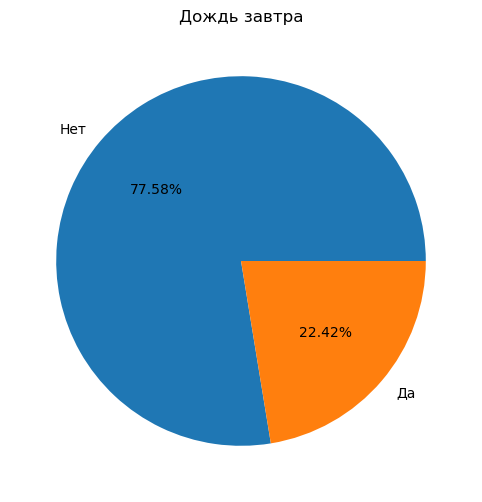

In [28]:
rain_tomorrow_counts_df = df["RainTomorrow"].value_counts()

plt.figure(figsize=(10, 6))
plt.title('Дождь завтра')
plt.pie(rain_tomorrow_counts_df.values
        , labels=["Нет", "Да"]
        , autopct='%.2f%%'
        );

## 4. Разделение данных на обучающие и тестовые признаки

### 4.1 Преобразование меток целевого признака в бинарные

In [29]:
df.loc[df['RainTomorrow'] == 'Yes', 'RainTomorrow'] = 1
df.loc[df['RainTomorrow'] == 'No', 'RainTomorrow'] = 0

### 4.2 Разделение данных

In [30]:
X = df.drop(columns=target_feature)
y = df[target_feature]

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    # stratify=y,
                                                    random_state=42)
X_train_orig.shape, X_test_orig.shape

((116368, 22), (29092, 22))

## 5. Предобработка данных с помощью класса и пайплайна

### 5.1 Заполнение пропусков в целевом признаке

In [31]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='most_frequent')
y_train = si.fit_transform(y_train_orig).flatten().astype('int')
y_test = si.transform(y_test_orig).flatten().astype('int')

### 5.2 Обработка вещественных и категориальных признаков

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataPipeline(BaseEstimator, TransformerMixin):
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        # граничные значения
        self.min_temp_min = None
        self.min_temp_max = None
        self.max_temp_min = None
        self.max_temp_max = None
        self.rainfall_max = None
        self.evaporation_max = None
        self.windgustspeed_max = None
        self.windspeed9am_max = None
        self.windspeed3pm_max = None
        self.humidity9am_min = None
        self.temp9am_min = None
        self.temp9am_max = None
        self.temp3pm_min = None
        self.temp3pm_max = None
        self.pressure9am_min = None
        self.pressure9am_max = None
        self.pressure3pm_min = None
        self.pressure3pm_max = None
        
        # средние значения
        self.min_temp_mean = None
        self.max_temp_mean = None
        self.rainfall_mean = None
        self.evaporation_mean = None
        self.windgustspeed_mean = None
        self.windspeed9am_mean = None
        self.windspeed3pm_mean = None
        self.humidity9am_mean = None
        self.temp9am_mean = None
        self.temp3pm_mean = None
        self.pressure9am_mean = None
        self.pressure3pm_mean = None


    def fit(self, df):
        """Сохранение статистик"""

        # if 'RainToday' in df.columns:
        #     df.loc[df['RainToday'] == 'Yes', 'RainToday'] = 1
        #     df.loc[df['RainToday'] == 'No', 'RainToday'] = 0
        if 'MinTemp' in df.columns:
            self.min_temp_mean = df['MinTemp'].mean()
            self.min_temp_min = self.min_temp_mean - 3 * df['MinTemp'].std()
            self.min_temp_max = self.min_temp_mean + 3 * df['MinTemp'].std()
        if 'MaxTemp' in df.columns:
            self.max_temp_mean = df['MaxTemp'].mean()
            self.max_temp_min = self.max_temp_mean - 3 * df['MaxTemp'].std()
            self.max_temp_max = self.max_temp_mean + 3 * df['MaxTemp'].std()
        if 'Rainfall' in df.columns:
            self.rainfall_mean = df['Rainfall'].mean()
            self.rainfall_max = self.rainfall_mean + 3 * df['Rainfall'].std()
        if 'Evaporation' in df.columns:
            self.evaporation_mean = df['Evaporation'].mean()
            self.evaporation_max = self.evaporation_mean + 3 * df['Evaporation'].std()
        if 'WindGustSpeed' in df.columns:
            self.windgustspeed_mean = df['WindGustSpeed'].mean()
            self.windgustspeed_max = self.windgustspeed_mean + 3 * df['WindGustSpeed'].std()
        if 'WindSpeed9am' in df.columns:
            self.windspeed9am_mean = df['WindSpeed9am'].mean()
            self.windspeed9am_max = self.windspeed9am_mean + 3 * df['WindSpeed9am'].std()
        if 'WindSpeed3pm' in df.columns:
            self.windspeed3pm_mean = df['WindSpeed3pm'].mean()
            self.windspeed3pm_max = self.windspeed3pm_mean + 3 * df['WindSpeed3pm'].std()
        if 'Humidity9am' in df.columns:
            self.humidity9am_mean = df['Humidity9am'].mean()
            self.humidity9am_min = self.humidity9am_mean - 3 * df['Humidity9am'].std()
        if 'Temp9am' in df.columns:
            self.temp9am_mean = df['Temp9am'].mean()
            self.temp9am_min = self.temp9am_mean - 3 * df['Temp9am'].std()
            self.temp9am_max = self.temp9am_mean + 3 * df['Temp9am'].std()
        if 'Temp3pm' in df.columns:
            self.temp3pm_mean = df['Temp3pm'].mean()
            self.temp3pm_min = self.temp3pm_mean - 3 * df['Temp3pm'].std()
            self.temp3pm_max = self.temp3pm_mean + 3 * df['Temp3pm'].std()
        if 'Pressure9am' in df.columns:
            self.pressure9am_mean = df['Pressure9am'].mean()
            self.pressure9am_min = self.pressure9am_mean - 3 * df['Pressure9am'].std()
            self.pressure9am_max = self.pressure9am_mean + 3 * df['Pressure9am'].std()
        if 'Pressure3pm' in df.columns:
            self.pressure3pm_mean = df['Pressure3pm'].mean()
            self.pressure3pm_min = self.pressure3pm_mean - 3 * df['Pressure3pm'].std()
            self.pressure3pm_max = self.pressure3pm_mean + 3 * df['Pressure3pm'].std()

        return self

    def transform(self, df):
        """Трансформация данных"""
        
        if 'RainToday' in df.columns:
            df.loc[df['RainToday'] == 'Yes', 'RainToday'] = 1
            df.loc[df['RainToday'] == 'No', 'RainToday'] = 0
        if 'MinTemp' in df.columns:
            df.loc[(df['MinTemp'] > self.min_temp_max) 
                   | (df['MinTemp'] < self.min_temp_min), 'MinTemp'] = self.min_temp_mean
        if 'MaxTemp' in df.columns:
            df.loc[(df['MaxTemp'] > self.max_temp_max) 
                   | (df['MaxTemp'] < self.max_temp_min), 'MaxTemp'] = self.max_temp_mean
        if 'Rainfall' in df.columns:
            df.loc[(df['Rainfall'] > self.rainfall_max), 'MaxTemp'] = self.rainfall_mean
        if 'Evaporation' in df.columns:
            df.loc[(df['Evaporation'] > self.evaporation_max), 'Evaporation'] = self.evaporation_mean
        if 'WindGustSpeed' in df.columns:
            df.loc[(df['WindGustSpeed'] > self.windgustspeed_max), 'WindGustSpeed'] = self.windgustspeed_mean
        if 'WindSpeed9am' in df.columns:
            df.loc[(df['WindSpeed9am'] > self.windspeed9am_max), 'WindSpeed9am'] = self.windspeed9am_mean
        if 'WindSpeed3pm' in df.columns:
            df.loc[(df['WindSpeed3pm'] > self.windspeed3pm_max), 'WindSpeed3pm'] = self.windspeed3pm_mean
        if 'Humidity9am' in df.columns:
            df.loc[(df['Humidity9am'] < self.humidity9am_min), 'Humidity9am'] = self.humidity9am_mean
        if 'Temp9am' in df.columns:
            df.loc[(df['Temp9am'] > self.temp9am_max) 
                   | (df['Temp9am'] < self.temp9am_min), 'Temp9am'] = self.temp9am_mean
        if 'Temp3pm' in df.columns:
            df.loc[(df['Temp3pm'] > self.temp3pm_max) 
                   | (df['Temp3pm'] < self.temp3pm_min), 'Temp3pm'] = self.temp3pm_mean
        if 'Pressure9am' in df.columns:
            df.loc[(df['Pressure9am'] > self.pressure9am_max) 
                   | (df['Pressure9am'] < self.pressure9am_min), 'Pressure9am'] = self.pressure9am_mean
        if 'Pressure3pm' in df.columns:
            df.loc[(df['Pressure3pm'] > self.pressure3pm_max) 
                   | (df['Pressure3pm'] < self.pressure3pm_min), 'Pressure3pm'] = self.pressure3pm_mean
    
        return df

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_pipe = make_pipeline(
    DataPipeline(),
    SimpleImputer(strategy="median"),
    StandardScaler()
)

cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),        # мода
    OneHotEncoder(handle_unknown="ignore")          # игнорирование неопознанных данных на тесте или в рабочих данных
)

bin_pipe = make_pipeline(
    DataPipeline(),
    SimpleImputer(strategy='most_frequent')
)


preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_features),
        ("cat", cat_pipe, cat_features),
        ("bin", bin_pipe, bin_features)
    ]
)


In [34]:
X_train = preprocessor.fit_transform(X_train_orig)
X_test = preprocessor.transform(X_test_orig)

In [35]:
X_train[0]

<1x3528 sparse matrix of type '<class 'numpy.float64'>'
	with 22 stored elements in Compressed Sparse Row format>

## 6. Обучение модели классификации с целевым признаком `RainTomorrow`

In [36]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
pred_proba_test = lr.predict_proba(X_test)

## 7. Оценка метрик качества

In [37]:
# для train'а
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     90911
           1       0.74      0.55      0.63     25457

    accuracy                           0.86    116368
   macro avg       0.81      0.75      0.77    116368
weighted avg       0.85      0.86      0.85    116368



In [38]:
# для test'а
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22672
           1       0.72      0.53      0.61      6420

    accuracy                           0.85     29092
   macro avg       0.80      0.74      0.76     29092
weighted avg       0.84      0.85      0.84     29092



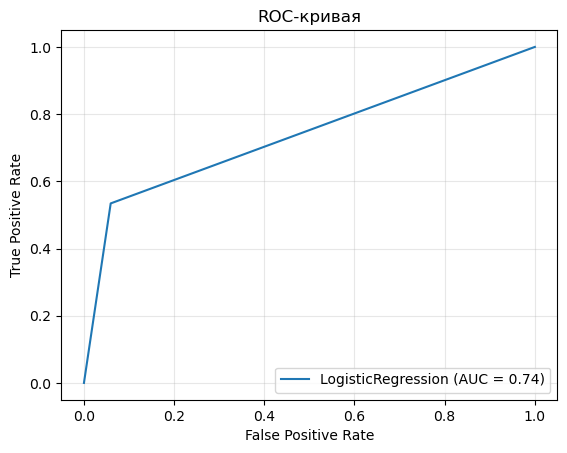

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test)
display = RocCurveDisplay(fpr=fpr, tpr=tpr
                          , roc_auc=auc(fpr, tpr)
                          , estimator_name='LogisticRegression')
display.plot()
plt.title('ROC-кривая')
plt.grid(True, alpha=.3)
plt.show()

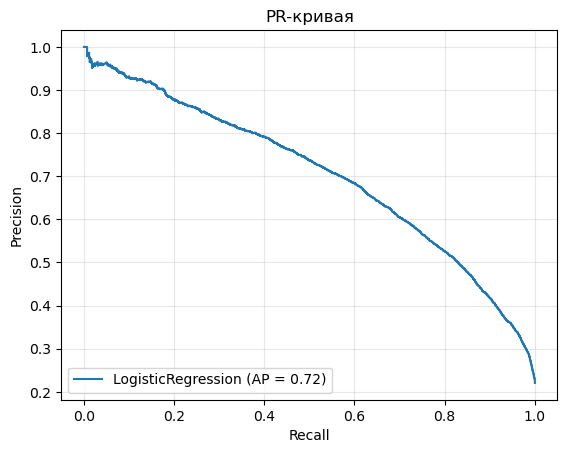

In [40]:
pr, r, _ = precision_recall_curve(y_test, pred_proba_test[:, 1])            # для класса 1

display = PrecisionRecallDisplay(precision=pr, recall=r
                                 , average_precision=precision_score(y_test, pred_test)
                                 , estimator_name='LogisticRegression')
display.plot()
plt.title("PR-кривая")
plt.grid(True, alpha=.3)
plt.show()

## 8. Выводы о проделанной работе

**Базовое решение:**

F1-score (для теста, макроусреднённая) равна **0.76**. Площадь под ROC-кривой - **0.73**. Средняя точность - **0.72**.

**Решение с обработкой данных:**

F1-score (для теста, макроусреднённая) равна **0.76**. Площадь под ROC-кривой - **0.74**. Средняя точность - **0.72**.